## Read datasets

In [2]:
import pandas as pd
random_state = 42
import warnings
warnings.filterwarnings('ignore')
from source.read_data import read_artificial_data, read_spam
from source.feature_selection_methods import change_data_with_selected_features, boruta_select_features, chi2_select_features, rfe_select_features, gini_select_features, ss_select_features
from source.metrics import balanced_accuracy, artificial_score, spam_score
from source.models import train_model, sequential_search_train_model
from source.number_of_features import search_best_features, plot_results

### Artificial dataset

In [3]:
art_train_X, art_train_y, art_val_X, art_val_y, art_test_data = read_artificial_data("data")
art_train_X.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
968,494,476,461,463,506,480,463,477,509,483,...,500,471,532,274,486,502,489,487,504,461
240,489,455,479,501,542,473,534,475,482,478,...,494,476,468,619,519,491,469,505,536,495
819,481,467,597,479,469,483,467,475,497,490,...,519,473,503,547,477,504,478,504,488,490
692,480,460,558,477,555,470,528,477,490,480,...,490,477,469,368,494,530,477,488,512,484
420,477,488,492,496,462,479,447,476,450,473,...,519,476,490,716,594,499,486,486,472,491


### Spam dataset
Transformed with use of [repo](https://github.com/edumunozsala/Intro-NLP-Text-Classification/blob/master/Intro_NLP_1_TFIDF_Text_Classification.ipynb)

In [4]:
spam_train_X, spam_train_y, spam_val_X, spam_val_y, spam_test_data = read_spam("data")
spam_train_X.head()

,00,000,000pes,008704050406,0121,01223585236,01223585334,02,0207,02073162414,...,zed,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature selection methods
1. Boruta
2. Chi-squared
3. Recursive Feature Elimination
4. Gini
5. Sequential Forward Search
6. Sequential Backward Search
7. L1 

## Models

In [6]:
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
no_features = 10

### Artificial data

#### 1. Boruta

In [5]:
%%capture
art_train_X_features=boruta_select_features(art_train_X, art_train_y)
art_train_X_boruta2=change_data_with_selected_features(art_train_X, art_train_X_features, boruta=True)
art_val_X_boruta2=change_data_with_selected_features(art_val_X, art_train_X_features, boruta=True)
art_test_data_boruta2=change_data_with_selected_features(art_test_data, art_train_X_features, boruta=True)

In [11]:
%%capture 
all_scores_artificial_boruta=pd.DataFrame(index=models, columns=['BA boruta', 'Score boruta'])
for model in models:
    BA, score=train_model(model, art_train_X_boruta2, art_train_y, art_val_X_boruta2, art_val_y, 'artificial')
    all_scores_artificial_boruta.loc[model]=[BA, score]

#### 2. Chi-squared

In [17]:
%%capture
art_train_X_chi2_features=chi2_select_features(art_train_X, art_train_y, no_features)
art_train_X_chi2=change_data_with_selected_features(art_train_X, art_train_X_chi2_features)
art_val_X_chi2=change_data_with_selected_features(art_val_X, art_train_X_chi2_features)
art_test_data_chi2=change_data_with_selected_features(art_test_data, art_train_X_chi2_features)

In [18]:
%%capture 
all_scores_artificial_chi=pd.DataFrame(index=models, columns=['BA chi', 'Score chi'])
for model in models:
    BA, score=train_model(model, art_train_X_chi2, art_train_y, art_val_X_chi2, art_val_y, 'artificial')
    all_scores_artificial_chi.loc[model]=[BA, score]

#### 3. Recursive Feature Elimination

In [19]:
%%capture
art_train_X_rfe_features=rfe_select_features(art_train_X, art_train_y, no_features)
art_train_X_rfe=change_data_with_selected_features(art_train_X, art_train_X_rfe_features)
art_val_X_rfe=change_data_with_selected_features(art_val_X, art_train_X_rfe_features)
art_test_data_rfe=change_data_with_selected_features(art_test_data, art_train_X_rfe_features)

In [20]:
%%capture 
all_scores_artificial_rfe=pd.DataFrame(index=models, columns=['BA rfe', 'Score rfe'])
for model in models:
    BA, score=train_model(model, art_train_X_rfe, art_train_y, art_val_X_rfe, art_val_y, 'artificial')
    all_scores_artificial_rfe.loc[model]=[BA, score]

#### 4. Gini

In [21]:
%%capture
art_train_X_gini_features=gini_select_features(art_train_X, art_train_y, depth=3, if_less=True, num_feats=no_features)
art_train_X_gini=change_data_with_selected_features(art_train_X, art_train_X_gini_features)
art_val_X_gini=change_data_with_selected_features(art_val_X, art_train_X_gini_features)
art_test_data_gini=change_data_with_selected_features(art_test_data, art_train_X_gini_features)

In [22]:
%%capture 
all_scores_artificial_gini=pd.DataFrame(index=models, columns=['BA gini', 'Score gini'])
for model in models:
    BA, score=train_model(model, art_train_X_gini, art_train_y, art_val_X_gini, art_val_y, 'artificial')
    all_scores_artificial_gini.loc[model]=[BA, score]

#### 5. Sequential Forward Search

In [7]:
%%capture 
all_scores_artificial_sfs=pd.DataFrame(index=models, columns=['BA gini', 'Score gini'])
for model in models:
    BA, score=sequential_search_train_model(model, art_train_X, art_train_y, art_val_X, art_val_y,'artificial', no_features, "forward")
    all_scores_artificial_gini.loc[model]=[BA, score]

#### 6. Sequential Backward Search

#### 7. L1 

In [168]:
all_results_artificial=pd.concat([all_scores_artificial_boruta, all_scores_artificial_chi, all_scores_artificial_rfe, all_scores_artificial_gini], axis=1)
all_results_artificial

,BA boruta,Score boruta,BA chi,Score chi,BA rfe,Score rfe,BA gini,Score gini
xgb,0.867583,0.835583,0.857205,0.847205,0.629542,0.609542,0.854967,0.824967
lda,0.545198,0.513198,0.569828,0.559828,0.515041,0.495041,0.580131,0.550131
svc,0.851904,0.819904,0.797042,0.787042,0.564152,0.544152,0.824661,0.794661
lr,0.550124,0.518124,0.549824,0.539824,0.515041,0.495041,0.549899,0.519899
rf,0.879673,0.847673,0.847203,0.837203,0.599535,0.579535,0.864595,0.834595
dt,0.809957,0.777957,0.825186,0.815186,0.60066,0.58066,0.815033,0.785033
knn,0.875272,0.843272,0.882211,0.872211,0.562814,0.542814,0.867433,0.837433


### Spam dataset

In [67]:
%%capture
spam_train_X_features=boruta_select_features(np.array(spam_train_X), spam_train_y)

In [76]:
spam_train_X_boruta2=change_data_with_selected_features(spam_train_X, spam_train_X_features, boruta=True)
spam_val_X_boruta2=change_data_with_selected_features(spam_val_X, spam_train_X_features, boruta=True)
spam_test_data_boruta2=change_data_with_selected_features(spam_test_data, spam_train_X_features, boruta=True)

In [91]:
spam_train_X_chi2_features=chi2_select_features(spam_train_X, spam_train_y, 100)
spam_train_X_chi2=change_data_with_selected_features(spam_train_X, spam_train_X_chi2_features)
spam_val_X_chi2=change_data_with_selected_features(spam_val_X, spam_train_X_chi2_features)
spam_test_data_chi2=change_data_with_selected_features(spam_test_data, spam_train_X_chi2_features)

In [106]:
%%capture
spam_train_X_rfe_features=rfe_select_features(spam_train_X, spam_train_y, 100)

NameError: name 'spam_vaml_X' is not defined

In [107]:
spam_train_X_rfe=change_data_with_selected_features(spam_train_X, spam_train_X_rfe_features)
spam_val_X_rfe=change_data_with_selected_features(spam_val_X, spam_train_X_rfe_features)
spam_test_data_rfe=change_data_with_selected_features(spam_test_data, spam_train_X_rfe_features)

In [108]:
%%capture
spam_train_X_gini_features=gini_select_features(spam_train_X, spam_train_y)
spam_train_X_gini=change_data_with_selected_features(spam_train_X, spam_train_X_gini_features)
spam_val_X_gini=change_data_with_selected_features(spam_val_X, spam_train_X_gini_features)
spam_test_data_gini=change_data_with_selected_features(spam_test_data, spam_train_X_gini_features)

In [158]:
print('boruta')
print(f'original: {art_train_X.shape}, boruta: {art_train_X_boruta2.shape}')
print(f'original: {spam_train_X.shape}, boruta: {spam_train_X_boruta2.shape}')
print('chi2')
print(f'original: {art_train_X.shape}, chi2: {art_train_X_chi2.shape}')
print(f'original: {spam_train_X.shape}, chi2: {spam_train_X_chi2.shape}')
print('rfe')
print(f'original: {art_train_X.shape}, rfe: {art_train_X_rfe.shape}')
print(f'original: {spam_train_X.shape}, rfe: {spam_train_X_rfe.shape}')
print('gini')
print(f'original: {art_train_X.shape}, gini: {art_train_X_gini.shape}')
print(f'original: {spam_train_X.shape}, gini: {spam_train_X_gini.shape}')

boruta
original: (1600, 500), boruta: (1600, 21)
original: (3657, 7005), boruta: (3657, 122)
chi2
original: (1600, 500), chi2: (1600, 10)
original: (3657, 7005), chi2: (3657, 100)
rfe
original: (1600, 500), rfe: (1600, 15)
original: (3657, 7005), rfe: (3657, 100)
gini
original: (1600, 500), gini: (1600, 63)
original: (3657, 7005), gini: (3657, 477)


In [109]:
%%capture 
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
all_scores_spam_boruta=pd.DataFrame(index=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn'],
                            columns=['BA boruta', 'Score boruta'])
for model in models:
    BA, score=train_model(model, art_train_X_boruta2, art_train_y, art_val_X_boruta2, art_val_y, 'spam')
    all_scores_spam_boruta.loc[model]=[BA, score]

In [110]:
%%capture 
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
all_scores_spam_chi=pd.DataFrame(index=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn'],
                            columns=['BA chi', 'Score chi'])
for model in models:
    BA, score=train_model(model, art_train_X_chi2, art_train_y, art_val_X_chi2, art_val_y, 'spam')
    all_scores_spam_chi.loc[model]=[BA, score]

In [111]:
%%capture 
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
all_scores_spam_rfe=pd.DataFrame(index=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn'],
                            columns=['BA rfe', 'Score rfe'])
for model in models:
    BA, score=train_model(model, art_train_X_rfe, art_train_y, art_val_X_rfe, art_val_y, 'spam')
    all_scores_spam_rfe.loc[model]=[BA, score]

In [112]:
%%capture 
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
all_scores_spam_gini=pd.DataFrame(index=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn'],
                            columns=['BA gini', 'Score gini'])
for model in models:
    BA, score=train_model(model, art_train_X_gini, art_train_y, art_val_X_gini, art_val_y, 'spam')
    all_scores_spam_gini.loc[model]=[BA, score]

In [114]:
all_results_spam=pd.concat([all_scores_spam_boruta, all_scores_spam_chi, all_scores_spam_rfe, all_scores_spam_gini], axis=1)
all_results_spam

,BA boruta,Score boruta,BA chi,Score chi,BA rfe,Score rfe,BA gini,Score gini
xgb,0.867583,0.867583,0.857205,0.857205,0.519817,0.519817,0.800105,0.761905
lda,0.545198,0.545198,0.569828,0.569828,0.544673,0.544673,0.532507,0.494307
svc,0.851904,0.851904,0.797042,0.797042,0.548473,0.548473,0.574604,0.536404
lr,0.550124,0.550124,0.549824,0.549824,0.547286,0.547286,0.529594,0.491394
rf,0.884824,0.884824,0.852279,0.852279,0.556463,0.556463,0.651559,0.613359
dt,0.812495,0.812495,0.832875,0.832875,0.524968,0.524968,0.772936,0.734736
knn,0.875272,0.875272,0.882211,0.882211,0.552062,0.552062,0.566015,0.527815


### Select number of features for each method except from boruta

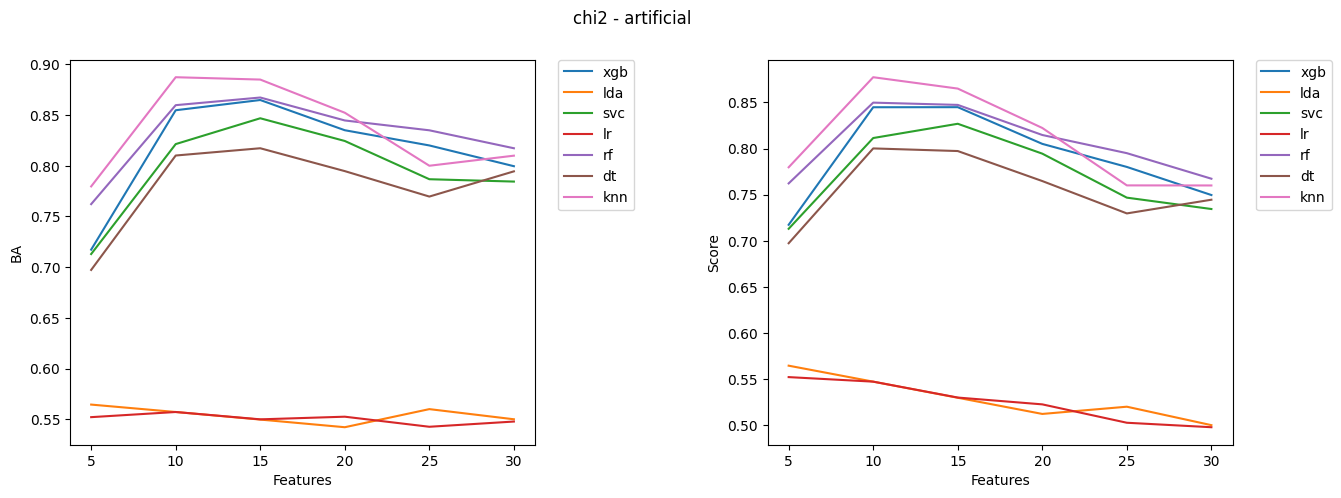

In [6]:
end_scores = search_best_features([5, 10, 15, 20, 25, 30], 'chi2', art_train_X, art_train_y, art_val_X, art_val_y, 'artificial')
plot_results(end_scores, "chi2 - artificial")

Fitting estimator with 500 features.
Fitting estimator with 490 features.
Fitting estimator with 480 features.
Fitting estimator with 470 features.
Fitting estimator with 460 features.
Fitting estimator with 450 features.
Fitting estimator with 440 features.
Fitting estimator with 430 features.
Fitting estimator with 420 features.
Fitting estimator with 410 features.
Fitting estimator with 400 features.
Fitting estimator with 390 features.
Fitting estimator with 380 features.
Fitting estimator with 370 features.
Fitting estimator with 360 features.
Fitting estimator with 350 features.
Fitting estimator with 340 features.
Fitting estimator with 330 features.
Fitting estimator with 320 features.
Fitting estimator with 310 features.
Fitting estimator with 300 features.
Fitting estimator with 290 features.
Fitting estimator with 280 features.
Fitting estimator with 270 features.
Fitting estimator with 260 features.
Fitting estimator with 250 features.
Fitting estimator with 240 features.
F

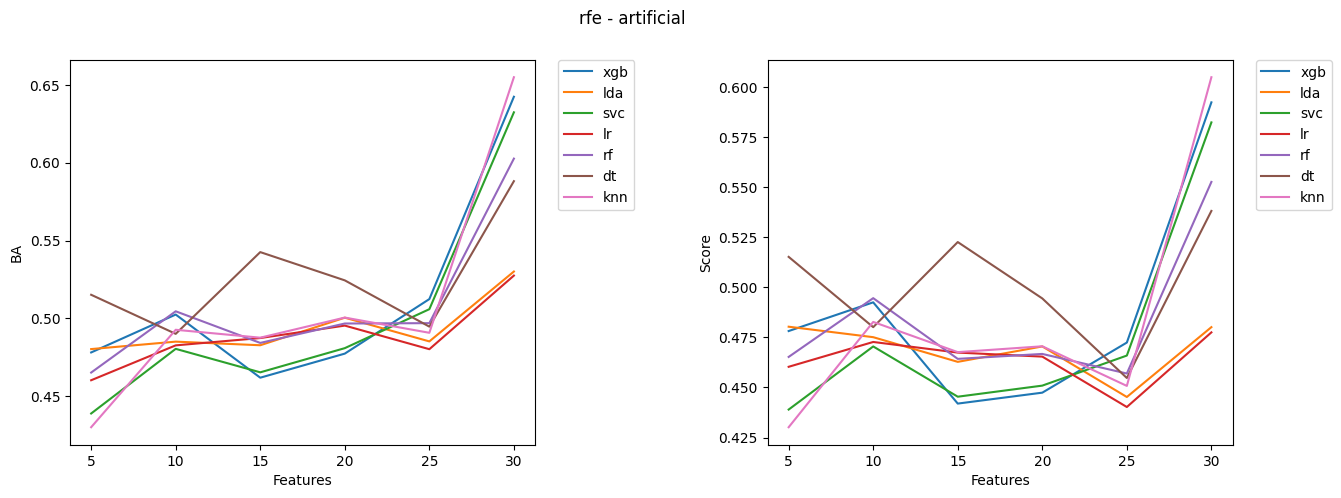

In [7]:
end_scores = search_best_features([5, 10, 15, 20, 25, 30], 'rfe', art_train_X, art_train_y, art_val_X, art_val_y, 'artificial')
plot_results(end_scores, "rfe - artificial")

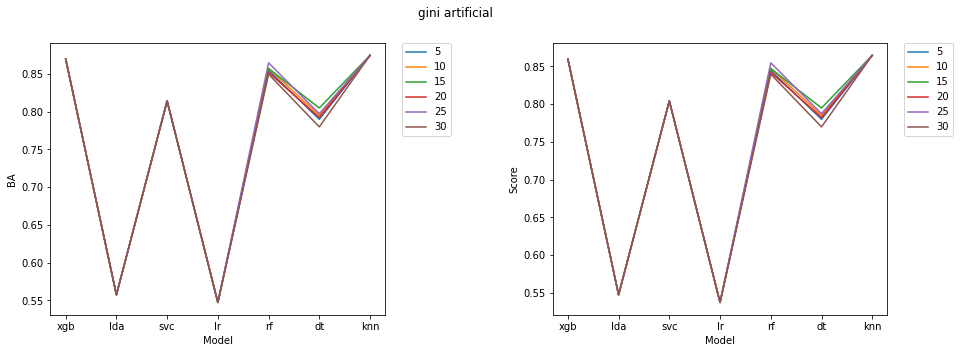

In [216]:
search_best_features([5, 10, 15, 20, 25, 30], 'gini', art_train_X, art_train_y, art_val_X, art_val_y, 'artificial')

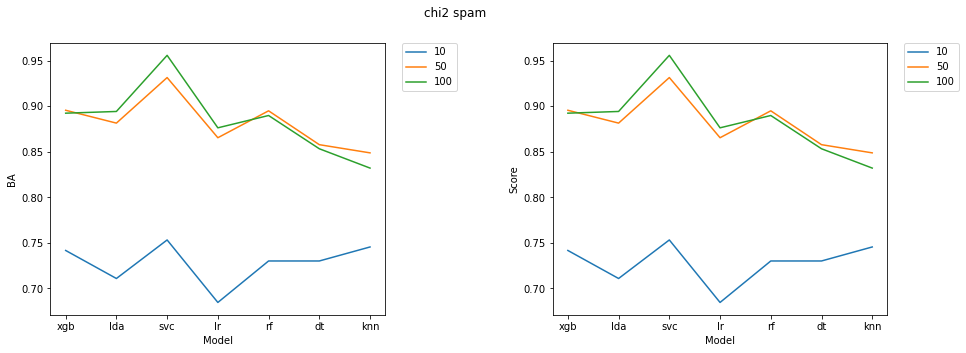

In [213]:
search_best_features([10, 50, 100], 'chi2', spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam')

Fitting estimator with 7005 features.
Fitting estimator with 6995 features.
Fitting estimator with 6985 features.
Fitting estimator with 6975 features.
Fitting estimator with 6965 features.
Fitting estimator with 6955 features.
Fitting estimator with 6945 features.
Fitting estimator with 6935 features.
Fitting estimator with 6925 features.
Fitting estimator with 6915 features.
Fitting estimator with 6905 features.
Fitting estimator with 6895 features.
Fitting estimator with 6885 features.
Fitting estimator with 6875 features.
Fitting estimator with 6865 features.
Fitting estimator with 6855 features.
Fitting estimator with 6845 features.
Fitting estimator with 6835 features.
Fitting estimator with 6825 features.
Fitting estimator with 6815 features.
Fitting estimator with 6805 features.
Fitting estimator with 6795 features.
Fitting estimator with 6785 features.
Fitting estimator with 6775 features.
Fitting estimator with 6765 features.
Fitting estimator with 6755 features.
Fitting esti

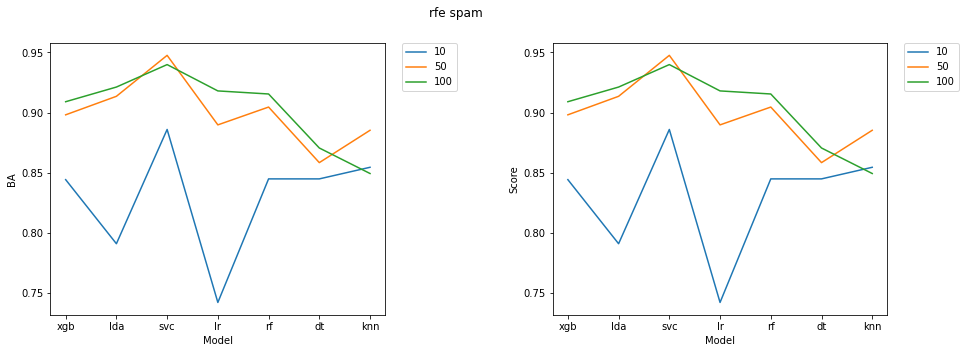

In [217]:
search_best_features([10, 50, 100], 'rfe', spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam')

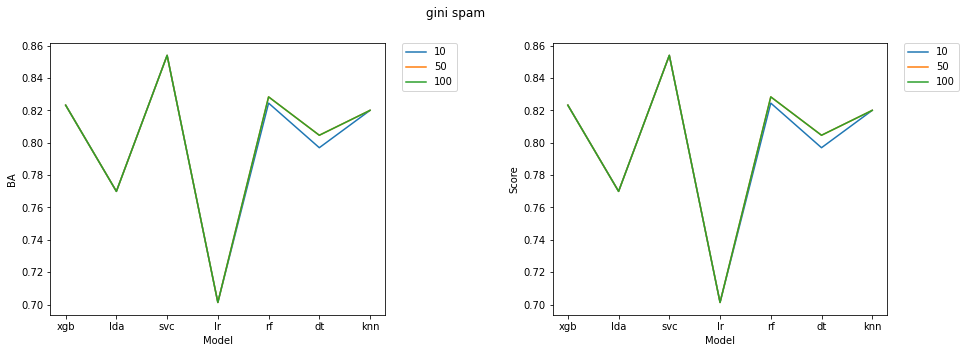

In [218]:
search_best_features([10, 50, 100], 'gini', spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam')

#### Train models, compare and choose the best for each problem to predict

In [227]:
last_comparison_artificial=pd.DataFrame(index=['chi2', 'gini', 'boruta'],
                            columns=['BA', 'Score', 'Model'])

In [228]:
#boruta
last_comparison_artificial.loc['boruta']= [0.879673, 0.847673, 'rf']

In [229]:
# chi2
art_train_X_chi2_features=chi2_select_features(art_train_X, art_train_y, 10)
art_train_X_chi2=change_data_with_selected_features(art_train_X, art_train_X_chi2_features)
art_val_X_chi2=change_data_with_selected_features(art_val_X, art_train_X_chi2_features)
art_test_data_chi2=change_data_with_selected_features(art_test_data, art_train_X_chi2_features)

model = 'knn'
BA, score=train_model(model, art_train_X_chi2, art_train_y, art_val_X_chi2, art_val_y, 'artificial')
last_comparison_artificial.loc['chi2']=[BA, score, model]

In [230]:
# gini
art_train_X_gini_features=gini_select_features(art_train_X, art_train_y, depth=3, if_less=True, num_to_select=5)
art_train_X_gini=change_data_with_selected_features(art_train_X, art_train_X_gini_features)
art_val_X_gini=change_data_with_selected_features(art_val_X, art_train_X_gini_features)
art_test_data_gini=change_data_with_selected_features(art_test_data, art_train_X_gini_features)

model = 'knn'
BA, score=train_model(model, art_train_X_gini, art_train_y, art_val_X_gini, art_val_y, 'artificial')
last_comparison_artificial.loc['gini']=[BA, score, model]

In [231]:
last_comparison_artificial #best is boruta with rf

,BA,Score,Model
chi2,0.789578,0.759578,knn
gini,0.707097,0.707097,knn
boruta,0.879673,0.847673,rf


Spam

In [232]:
last_comparison_spam=pd.DataFrame(index=['chi2', 'rfe','gini', 'boruta'],
                            columns=['BA', 'Score', 'Model'])

In [233]:
#boruta
last_comparison_spam.loc['boruta']= [0.867583, 0.867583, 'knn']

In [234]:
#chi 2
spam_train_X_chi2_features=chi2_select_features(spam_train_X, spam_train_y, 100)
spam_train_X_chi2=change_data_with_selected_features(spam_train_X, spam_train_X_chi2_features)
spam_val_X_chi2=change_data_with_selected_features(spam_val_X, spam_train_X_chi2_features)
spam_test_data_chi2=change_data_with_selected_features(spam_test_data, spam_train_X_chi2_features)

model = 'svc'
BA, score=train_model(model, spam_train_X_chi2, spam_train_y, spam_val_X_chi2, spam_val_y, 'spam')
last_comparison_spam.loc['chi2']=[BA, score, model]

In [239]:
%%capture
#rfe
spam_train_X_rfe_features=rfe_select_features(spam_train_X, spam_train_y, 100)
spam_train_X_rfe=change_data_with_selected_features(spam_train_X, spam_train_X_rfe_features)
spam_val_X_rfe=change_data_with_selected_features(spam_val_X, spam_train_X_rfe_features)
spam_test_data_rfe=change_data_with_selected_features(spam_test_data, spam_train_X_rfe_features)

model = 'svc'
BA, score=train_model(model, spam_train_X_rfe, spam_train_y, spam_val_X_rfe, spam_val_y, 'spam')
last_comparison_spam.loc['rfe']=[BA, score, model]

In [235]:
#gini
spam_train_X_gini_features=gini_select_features(spam_train_X, spam_train_y, depth=3, if_less=True, num_to_select=100)
spam_train_X_gini=change_data_with_selected_features(spam_train_X, spam_train_X_gini_features)
spam_val_X_gini=change_data_with_selected_features(spam_val_X, spam_train_X_gini_features)
spam_test_data_gini=change_data_with_selected_features(spam_test_data, spam_train_X_gini_features)

model = 'svc'
BA, score=train_model(model, spam_train_X_gini, spam_train_y, spam_val_X_gini, spam_val_y, 'spam')
last_comparison_spam.loc['gini']=[BA, score, model]

In [240]:
last_comparison_spam #chi2 with svc is the best

,BA,Score,Model
chi2,0.95583,0.95583,svc
rfe,0.939809,0.939809,svc
gini,0.937874,0.937874,svc
boruta,0.867583,0.867583,knn


predict for artificial test data for the best model

In [242]:
art_model = RandomForestClassifier()
art_model.fit(art_train_X_boruta2, art_train_y)
art_test_y_pred_proba=art_model.predict_proba(art_test_data_boruta2)

In [247]:
prob_test_art=art_test_y_pred_proba[:,1]

In [253]:
features_art=np.array(art_train_X_boruta2.columns)

In [257]:
features_art

array([ 28,  48,  64, 105, 128, 153, 204, 241, 281, 318, 336, 338, 378,
       424, 433, 442, 451, 453, 472, 475, 493], dtype=int64)

In [255]:
#save to txt files
np.savetxt('AGAKAC_artificial_prediction.txt', prob_test_art)
np.savetxt('AGAKAC_artificial_features.txt', features_art)
# do nich trzeba dodać w pierwszej linii jeszcze raz ten kod, który jest w nazwie

predict for spam test data for the best model

In [260]:
spam_model = SVC(probability=True)
spam_model.fit(spam_train_X_chi2, spam_train_y)
spam_test_y_pred_proba=spam_model.predict_proba(spam_test_data_chi2)
spam_test_y_pred=spam_model.predict(spam_test_data_chi2)

In [263]:
prob_test_spam=spam_test_y_pred_proba[:,1]

In [269]:
features_spam=np.where(spam_train_X_chi2_features==True)[0]


In [272]:
features_spam

array([   0,   41,  219,  220,  228,  244,  254,  256,  260,  265,  269,
        293,  316,  339,  462,  463,  464,  536,  552,  601,  604,  765,
        915, 1008, 1036, 1039, 1040, 1281, 1444, 1446, 1461, 1508, 1647,
       1679, 1691, 1701, 1716, 1721, 1754, 1780, 1791, 1888, 1919, 2215,
       2373, 2467, 2703, 2735, 2832, 2951, 3199, 3381, 3625, 3627, 3648,
       3737, 3846, 4099, 4100, 4104, 4204, 4249, 4338, 4347, 4486, 4493,
       4527, 4640, 4753, 4819, 4890, 4893, 4998, 5030, 5079, 5165, 5231,
       5310, 5430, 5459, 5865, 5956, 6131, 6289, 6290, 6409, 6415, 6417,
       6434, 6486, 6502, 6539, 6577, 6623, 6733, 6803, 6814, 6841, 6856,
       6912], dtype=int64)

In [273]:
#save to txt files
np.savetxt('AGAKAC_spam_prediction.txt', prob_test_spam)
np.savetxt('AGAKAC_spam_features.txt', features_spam)
# do nich trzeba dodać w pierwszej linii jeszcze raz ten kod, który jest w nazwie